## Практическое задание. Анализ данных пассажиров "Титаника"

In [65]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Считаем данные из файла в память в виде объекта Pandas.DataFrame

In [66]:
data = pd.read_csv('train.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [68]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [69]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**1. Сколько мужчин / жещин находилось на борту?**

In [9]:
print('male: ', len(data[data['Sex'] == 'male']), 'female: ', len(data[data['Sex'] == 'female']))

male:  577 female:  314


**2. Выведите распределение погибших/выживших по переменной Pclass (социально-экономический статус). Дополнительно - это же распределение, но еще учитывая пол.**


percent of survived men:
 18.890814558058924
percent of survived women:
 74.20382165605095

Survived women by class:
 1    91
3    72
2    70
Name: Pclass, dtype: int64

Dead women by class:
 3    72
2     6
1     3
Name: Pclass, dtype: int64

Survived men by class:
 3    47
1    45
2    17
Name: Pclass, dtype: int64

Dead men by class:
 3    300
2     91
1     77
Name: Pclass, dtype: int64


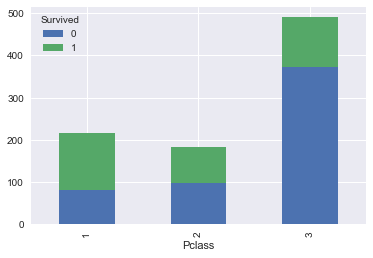

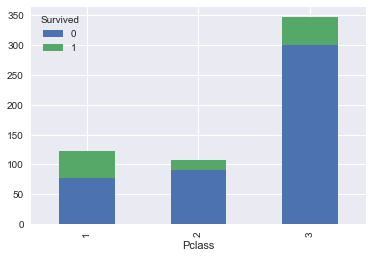

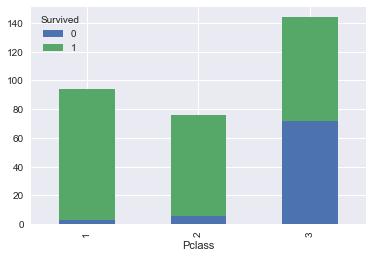

In [181]:
#print('survived man by class:\n', data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Pclass'].hist())
#print('survived women by class:\n', data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Pclass'].value_counts())
print('percent of survived men:\n', len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])/len(data[data['Sex'] == 'male']) * 100)
print('percent of survived women:\n', len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])/len(data[data['Sex'] == 'female']) * 100)
print('\nSurvived women by class:\n', data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Pclass'].value_counts())
print('\nDead women by class:\n', data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Pclass'].value_counts())
print('\nSurvived men by class:\n', data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Pclass'].value_counts())
print('\nDead men by class:\n', data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Pclass'].value_counts())
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)
data[data['Sex'] == 'male'].pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)
data[data['Sex'] == 'female'].pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

**3. Сколько в среднем заплатил один пассажир? Найдите дисперсию этой величины. Сколько все пассажиры заплатили в сумме?**

In [174]:
print(u'В среднем: ', data['Fare'].mean(), u'\nДисперсия: ',  data['Fare'].var(), u'\nВсего: ', data['Fare'].count())
data['Fare'].describe()


В среднем:  32.2042079685746 
Дисперсия:  2469.436845743117 
Всего:  891


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.**

0.40625 0.22727272727272727 True


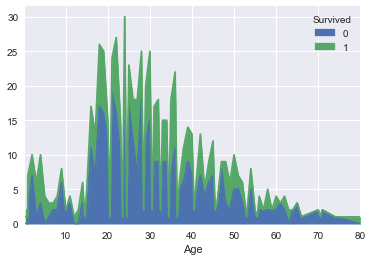

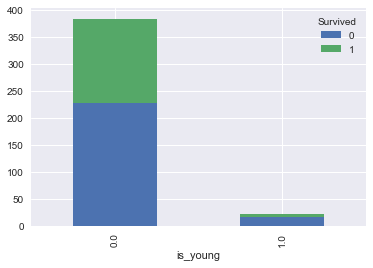

In [171]:
P_surv_young = len(data[(data['Survived'] == 1) & (data['Age'] < 30)])/len(data[data['Age'] < 30])
P_surv_old = len(data[(data['Survived'] == 1) & (data['Age'] > 60)])/len(data[data['Age'] > 60])
print (P_surv_young, P_surv_old, True if P_surv_young > P_surv_old else False)
data['is_young'] = data.apply(func=(lambda x: 0 if x['Age'] < 30 else (1 if x['Age'] > 60 else None)), axis=1)
data.pivot_table('PassengerId', 'Age', 'Survived', aggfunc='count').plot(kind='area', stacked=True)
data.pivot_table('PassengerId', 'is_young', 'Survived', aggfunc='count').plot(kind='bar', stacked=True)
data = data.drop('is_young', 1)

**5. Правда ли, что женщины выживали чаще мужчин?**

In [112]:
P_surv_men = len(data[(data['Survived'] == 1) & (data['Sex'] == 'male')])/len(data[data['Sex'] == 'male'])
P_surv_women = len(data[(data['Survived'] == 1) & (data['Sex'] == 'female')])/len(data[data['Sex'] == 'female'])
print (P_surv_men, P_surv_women, True if P_surv_men < P_surv_old else False)


0.18890814558058924 0.7420382165605095 True


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [132]:
data[data['Sex'] == 'male'].apply(func=lambda df: df['Name'].split(',')[1].split(' ')[2], axis=1).value_counts()[:1]

William    35
dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

Average ticket cost for survived:  48.39540760233917 
Average ticket cost for dead:  22.117886885245877


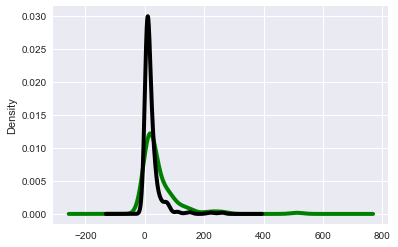

In [140]:
#data['price'] = data.apply(func=(lambda x: 0 if x['Fare'] < 100 else (1 if x['Fare'] < 200 else 2)), axis=1, raw='price')
#data.pivot_table(values='PassengerId', index='Fare', columns='Survived', aggfunc='count').plot(kind='bar', stacked=True)
print('Average ticket cost for survived: ', data[data['Survived'] == 1]['Fare'].mean(),
      '\nAverage ticket cost for dead: ', data[data['Survived'] == 0]['Fare'].mean()) 
data[data['Survived'] == 1]['Fare'].plot(kind='kde', style='green', linewidth=4)
data[data['Survived'] == 0]['Fare'].plot(kind='kde', style='black', linewidth=4)

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**


Средний возраст мужчин в первом классе:  41.28138613861386

Средний возраст мужчин во втором классе:  30.74070707070707

Средний возраст мужчин в третьем классе:  26.507588932806325

Средний возраст женщин в первом классе:  34.61176470588235

Средний возраст женщин во втором классе:  28.722972972972972

Средний возраст женщин в третьем классе:  21.75


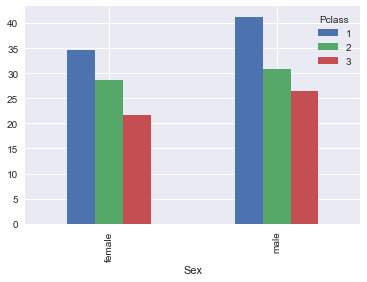

In [169]:
print(u'\nСредний возраст мужчин в первом классе: ', data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].mean())
print(u'\nСредний возраст мужчин во втором классе: ', data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].mean())
print(u'\nСредний возраст мужчин в третьем классе: ', data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Age'].mean())
print(u'\nСредний возраст женщин в первом классе: ', data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].mean())
print(u'\nСредний возраст женщин во втором классе: ', data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Age'].mean())
print(u'\nСредний возраст женщин в третьем классе: ', data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Age'].mean())

data.pivot_table('Age', 'Sex', 'Pclass', 'mean').plot(kind='bar')

In [225]:
len(data[(data['Survived'] == 1) & (data['Sex'] == 'male') & (data['Age'] > 20) & (data['Pclass'] == 3) & (data['Parch']>0)])

0